<a href="https://colab.research.google.com/github/Darkunquie/FMML_PROJECT_2024/blob/main/Module%203-Lab%202%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE 3: CLASSIFICATION-1**

LAB-2 : Implementing KNN from scratch and visualize Algorithm performance

**Section 1: Implementing KNN**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from collections import Counter

In [2]:
def predict(X_train, y_train, X_test, k):
    distances = []
    targets = []

    for i in range(len(X_train)):
        distances.append([np.sqrt(np.sum(np.square(X_test - X_train[i, :]))), i])

    distances = sorted(distances)

    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])
    return Counter(targets).most_common(1)[0][0]

def k_nearest_neighbor(X_train, y_train, X_test, k):

    assert k <= len(X_train), "[!] K cannot be larger than number of samples."


    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [3]:
def NN1(traindata, trainlabel, query):
  diff  = traindata - query
  sq = diff*diff
  dist = sq.sum(1)
  label = trainlabel[np.argmin(dist)]
  return label

In [5]:
def Accuracy(gtlabel, predlabel):
  assert len(gtlabel)==len(predlabel), "Length of the groundtruth labels and predicted labels should be the same"
  correct = (gtlabel==predlabel).sum()
  return correct/len(gtlabel)

**Section 1.1 - Iris Dataset**

scikit learn library

In [6]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df["target"] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
X = np.array(df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y = np.array(df['target'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=17)

In [8]:
# Making our predictions
predictions = k_nearest_neighbor(X_train, y_train, X_test, 7)

# evaluating accuracy
accuracy = Accuracy(y_test, predictions)
print("The accuracy of our classifier is {} %".format(100*accuracy))

The accuracy of our classifier is 94.0 %


 sklearn implementation

In [9]:
from sklearn.neighbors import KNeighborsClassifier

sklearn_knn = KNeighborsClassifier(n_neighbors=7)
sklearn_knn.fit(X_train,y_train)
sklearn_predictions = sklearn_knn.predict(X_test)
accuracy = accuracy_score(y_test, sklearn_predictions)
print("The accuracy of Sklearn classifier is {} %".format(100*accuracy))

The accuracy of Sklearn classifier is 94.0 %


**Section 1.2: Weighted NN**

task

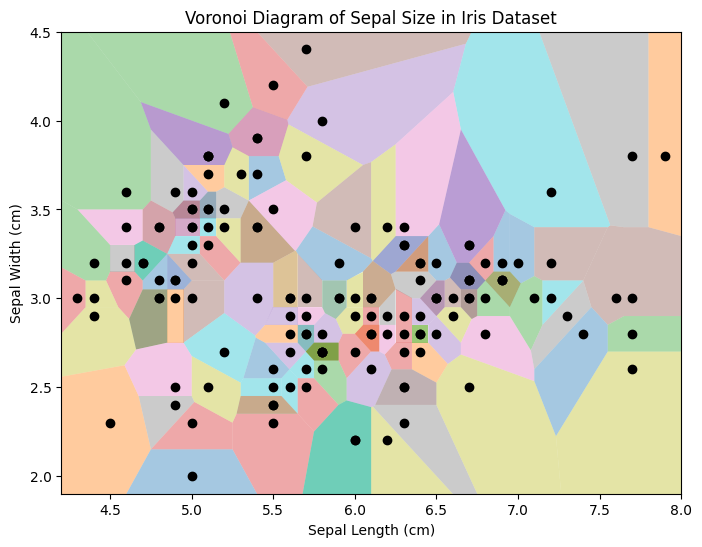

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from sklearn.datasets import load_iris
import pandas as pd

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite Voronoi regions in a 2D diagram to finite regions.
    Parameters:
    vor (Voronoi): Input Voronoi object.
    radius (float or None): Distance to 'points at infinity'.
    Returns:
    (list of lists of ints, list of tuples): Finite regions and vertices.
    """
    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max() * 2

    # Construct a map of all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        # Reconstruct a missing region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            tangent = vor.points[p2] - vor.points[p1]
            tangent /= np.linalg.norm(tangent)
            normal = np.array([-tangent[1], tangent[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, normal)) * normal
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)


# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Prepare points for Voronoi diagram
points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
    points.append([xpts[i], ypts[i]])
points = np.array(points)

# Compute Voronoi tessellation
vor = Voronoi(points)

# Get finite regions for plotting
regions, vertices = voronoi_finite_polygons_2d(vor)

# Plot Voronoi diagram
plt.figure(figsize=(8, 6))
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:, 0], points[:, 1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.title('Voronoi Diagram of Sepal Size in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


**Section 2: Visualizing Data**

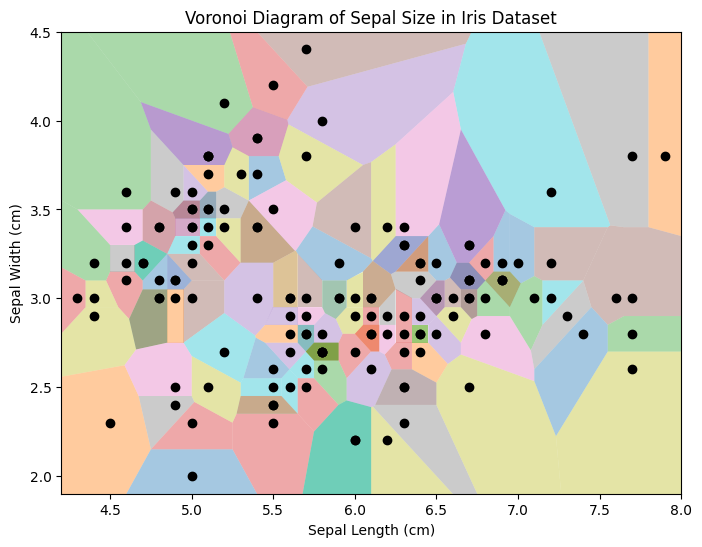

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from sklearn.datasets import load_iris
import pandas as pd

def voronoi_finite_polygons_2d(vor, radius=None):
    """
    Reconstruct infinite Voronoi regions in a 2D diagram to finite regions.
    Parameters:
    vor (Voronoi): Input Voronoi object.
    radius (float or None): Distance to 'points at infinity'.
    Returns:
    (list of lists of ints, list of tuples): Finite regions and vertices.
    """
    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max() * 2

    # Construct a map of all ridges for a given point
    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        # Reconstruct a missing region
        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            tangent = vor.points[p2] - vor.points[p1]
            tangent /= np.linalg.norm(tangent)
            normal = np.array([-tangent[1], tangent[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, normal)) * normal
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)


# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Prepare points for Voronoi diagram
points = []
xpts = np.array(df['sepal length (cm)'])
ypts = np.array(df['sepal width (cm)'])
for i in range(len(xpts)):
    points.append([xpts[i], ypts[i]])
points = np.array(points)

# Compute Voronoi tessellation
vor = Voronoi(points)

# Get finite regions for plotting
regions, vertices = voronoi_finite_polygons_2d(vor)

# Plot Voronoi diagram
plt.figure(figsize=(8, 6))
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(points[:, 0], points[:, 1], 'ko')
plt.xlim(vor.min_bound[0] - 0.1, vor.max_bound[0] + 0.1)
plt.ylim(vor.min_bound[1] - 0.1, vor.max_bound[1] + 0.1)
plt.title('Voronoi Diagram of Sepal Size in Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()


Section 2.2: Understanding Decision Boundaries

Decision Boundary



In [19]:
from matplotlib.colors import ListedColormap
import seaborn as sns


def decision_boundary_plot(x_dec,y_dec,k):
  h = .02
  n = len(set(y_dec))
  cmap_light = ListedColormap(['pink', 'green', 'cyan','yellow'][:n])
  cmap_bold = ['pink', 'darkgreen', 'blue','yellow'][:n]

  for weights in ['uniform', 'distance']:
      clf = KNeighborsClassifier(n_neighbors=k, weights=weights)
      clf.fit(x_dec, y_dec)

      x_min, x_max = x_dec[:, 0].min() - 1, x_dec[:, 0].max() + 1
      y_min, y_max = x_dec[:, 1].min() - 1, x_dec[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                          np.arange(y_min, y_max, h))
      Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

      Z = Z.reshape(xx.shape)
      plt.figure(figsize=(8, 6))
      plt.contourf(xx, yy, Z, cmap=cmap_light)

      sns.scatterplot(x=x_dec[:, 0], y=x_dec[:, 1], hue=y_dec,
                      palette=cmap_bold, alpha=1.0, edgecolor="black")
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Multi-Classification (k = %i, weights = '%s')"% (k, weights))

  plt.show()


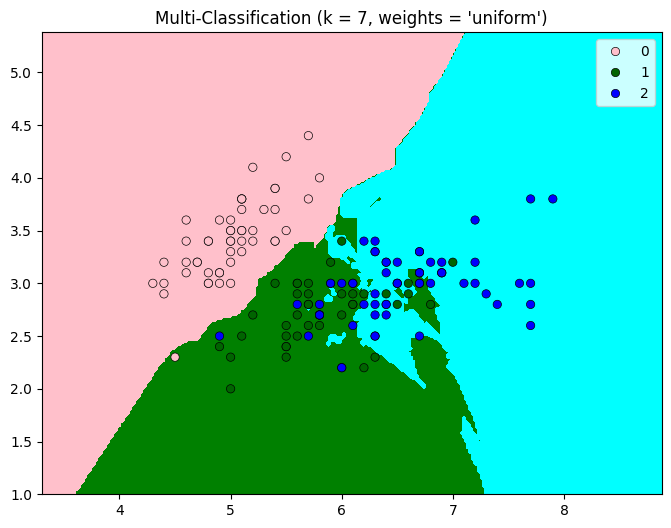

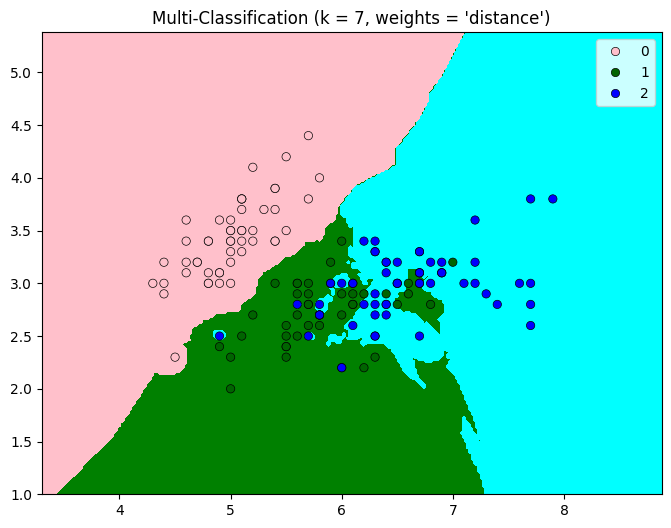

In [20]:
x_pts = X[:,:2]
y_pts = y
decision_boundary_plot(x_pts,y_pts,7)

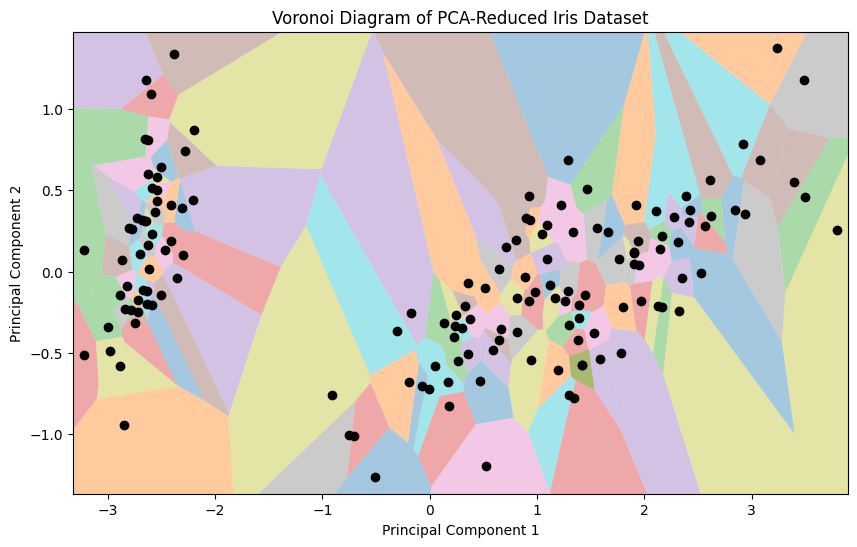

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import pandas as pd

def voronoi_finite_polygons_2d(vor, radius=None):
    new_regions = []
    new_vertices = vor.vertices.tolist()

    center = vor.points.mean(axis=0)
    if radius is None:
        radius = vor.points.ptp().max() * 2

    all_ridges = {}
    for (p1, p2), (v1, v2) in zip(vor.ridge_points, vor.ridge_vertices):
        all_ridges.setdefault(p1, []).append((p2, v1, v2))
        all_ridges.setdefault(p2, []).append((p1, v1, v2))

    for p1, region in enumerate(vor.point_region):
        vertices = vor.regions[region]

        if all(v >= 0 for v in vertices):
            new_regions.append(vertices)
            continue

        ridges = all_ridges[p1]
        new_region = [v for v in vertices if v >= 0]

        for p2, v1, v2 in ridges:
            if v2 < 0:
                v1, v2 = v2, v1
            if v1 >= 0:
                continue

            tangent = vor.points[p2] - vor.points[p1]
            tangent /= np.linalg.norm(tangent)
            normal = np.array([-tangent[1], tangent[0]])

            midpoint = vor.points[[p1, p2]].mean(axis=0)
            direction = np.sign(np.dot(midpoint - center, normal)) * normal
            far_point = vor.vertices[v2] + direction * radius

            new_region.append(len(new_vertices))
            new_vertices.append(far_point.tolist())

        vs = np.asarray([new_vertices[v] for v in new_region])
        c = vs.mean(axis=0)
        angles = np.arctan2(vs[:, 1] - c[1], vs[:, 0] - c[0])
        new_region = np.array(new_region)[np.argsort(angles)]

        new_regions.append(new_region.tolist())

    return new_regions, np.asarray(new_vertices)


iris = load_iris()
X = iris.data
y = iris.target

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)


vor = Voronoi(X_reduced)

regions, vertices = voronoi_finite_polygons_2d(vor)

plt.figure(figsize=(10, 6))
for region in regions:
    polygon = vertices[region]
    plt.fill(*zip(*polygon), alpha=0.4)

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'ko')

plt.xlim(X_reduced[:, 0].min() - 0.1, X_reduced[:, 0].max() + 0.1)
plt.ylim(X_reduced[:, 1].min() - 0.1, X_reduced[:, 1].max() + 0.1)
plt.title('Voronoi Diagram of PCA-Reduced Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_reduced, y)

h = .02  # step size in the mesh
cmap_light = ListedColormap(['orange', 'lightgreen', 'lightblue'])
cmap_bold = ['darkorange', 'green', 'darkblue']

x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

**Section 2.3: Confusion Matrix**

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
print(confusion_matrix(y_test,predictions))
pd.crosstab(y_test, predictions, rownames=['True'], colnames=['Predicted'], margins=True)

[[13  0  0]
 [ 0 22  0]
 [ 0  3 12]]


Predicted,0,1,2,All
True,,,,
0,13,0,0,13
1,0,22,0,22
2,0,3,12,15
All,13,25,12,50


Text(0.5, 23.52222222222222, 'Predicted label')

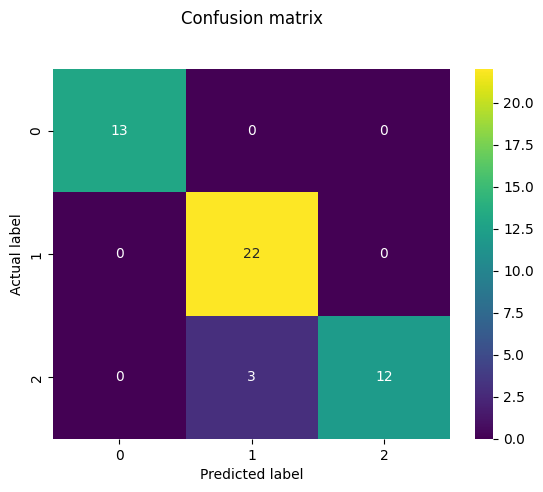

In [25]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Section 2.4: Classification Report**

In [27]:

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.94        22
           2       1.00      0.80      0.89        15

    accuracy                           0.94        50
   macro avg       0.96      0.93      0.94        50
weighted avg       0.95      0.94      0.94        50



**Car Evaluation Dataset**

In [28]:
from google.colab import files
uploaded = files.upload()

Saving car_evaluation.csv to car_evaluation.csv


In [29]:
car_df = pd.read_csv('car_evaluation.csv')
car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [30]:
for x in car_df.columns:
  # print(x)
  le = preprocessing.LabelEncoder()
  le.fit(car_df[x])
  car_df[x]=le.transform(car_df[x])

car_df

,buying price,maintenance cost,num_doors,num_persons,lug_boot,safety,decision
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2
...,...,...,...,...,...,...,...
1722,1,1,3,2,1,2,1
1723,1,1,3,2,1,0,3
1724,1,1,3,2,0,1,2
1725,1,1,3,2,0,2,1


In [31]:
dataset = car_df.values
X = dataset[:,0:6]
y = np.array(dataset[:,6])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19)

In [32]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
score = accuracy_score(y_test, predictions)
print("The accuracy of the classifier on Car evaluation dataset is {:.2f} %".format(100*score))

The accuracy of the classifier on Car evaluation dataset is 89.88 %


 TASK-3
  Plot a Confusion Matrix for the results of the Car evaluation dataset

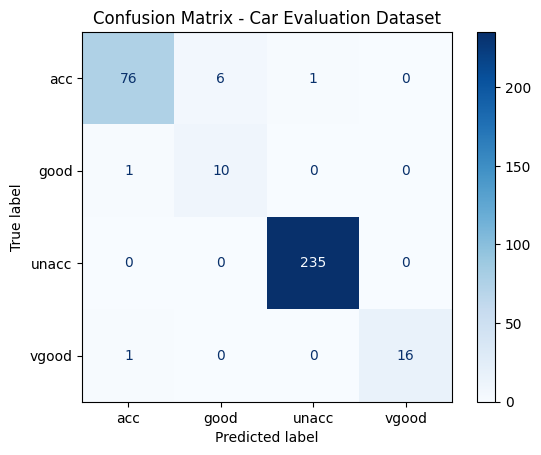

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Car Evaluation dataset
# Assuming the dataset is named `car.csv` and has no header
# The dataset attributes: buying, maint, doors, persons, lug_boot, safety, and class
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'

column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(data_url, header=None, names=column_names)

# Preprocess the data
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the data into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Decision Tree as an example)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['class'].classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Car Evaluation Dataset")
plt.show()


 TASK-4 -
Print a Classification Report for the results of the Car evaluation dataset

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the Car Evaluation dataset
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(data_url, header=None, names=column_names)

# Preprocess the data
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the data into features and target
X = df.drop('class', axis=1)
y = df['class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier (Decision Tree as an example)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print the classification report
print("Classification Report:")
target_names = label_encoders['class'].inverse_transform(range(len(label_encoders['class'].classes_)))
print(classification_report(y_test, y_pred, target_names=target_names))


Classification Report:
              precision    recall  f1-score   support

         acc       0.97      0.92      0.94        83
        good       0.62      0.91      0.74        11
       unacc       1.00      1.00      1.00       235
       vgood       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.90      0.94      0.91       346
weighted avg       0.98      0.97      0.98       346



TASK-5 -
 Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

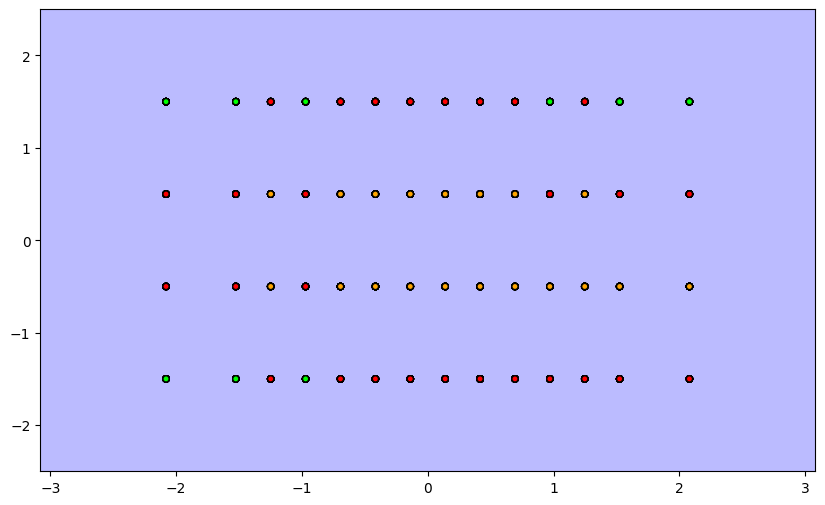

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

# Load the Car Evaluation dataset
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(data_url, header=None, names=column_names)

# Preprocess the data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the data into features and target
X = df.drop('class', axis=1)
y = df['class']

# Apply PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train a classifier on the reduced data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the decision boundary
h = .02  # step size in the mesh
# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFD700'])
cmap_bold = ['#FF0000', '#0000FF', '#00FF00', '#FFA500']

# Create a mesh to plot in
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class using data and fill decision boundary areas
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

# Plot also the training points
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=ListedColormap(cmap_bold),
                      edgecolor='k', s=20)

# Produce legend from unique target names
plt.legend(handles=scatter.legend_elements()[0], labels=label_encoders['class'].classes_)

plt.title("Decision Boundary with PCA-reduced Car Evaluation Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()


 TASK-5 - Plot the Decision boundary diagram for the classifier of the Car evaluation dataset

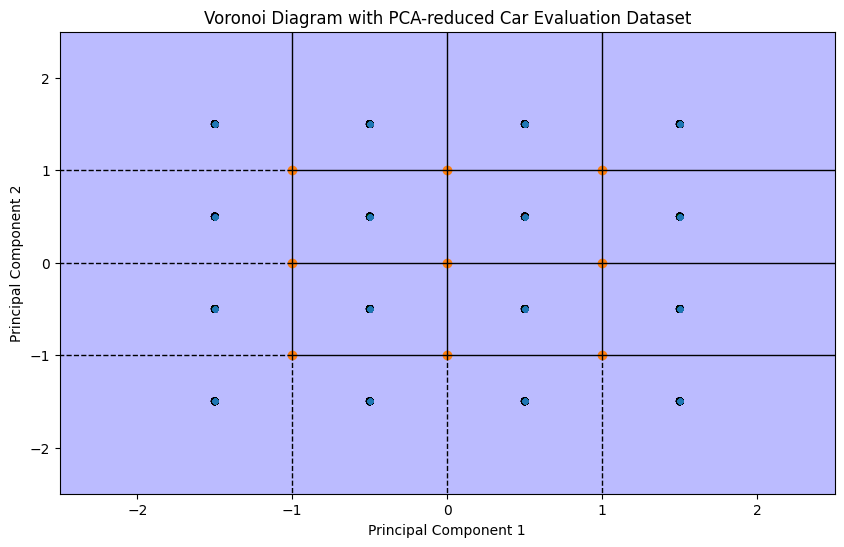

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from scipy.spatial import Voronoi, voronoi_plot_2d

# Load and preprocess the data (same as TASK-5)
# ...

# Apply PCA to reduce to two dimensions
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

# Split the reduced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Train a classifier on the reduced data
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Plot the Voronoi diagram
plt.figure(figsize=(10, 6))

# Create a meshgrid of points to evaluate
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict the class for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the Voronoi diagram
vor = Voronoi(X_train)
voronoi_plot_2d(vor, ax=plt.gca())

# Plot the decision regions
plt.contourf(xx, yy, Z, cmap=ListedColormap(['#FFAAAA', '#AAAAFF', '#AAFFAA', '#FFD700']), alpha=0.8)

# Plot the training data points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=ListedColormap(['#FF0000', '#0000FF', '#00FF00', '#FFA500']),
            edgecolor='k', s=20)

plt.title("Voronoi Diagram with PCA-reduced Car Evaluation Dataset")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()


Questions to Think About and Answer

1. In the section on Decision boundaries, you must have seen that we ran the KNN algorithm twice: first with the weights set to 'uniform' and then set to 'distance'. Find out the difference between these two.

A. The difference between 'uniform' and 'distance' weights in the KNN algorithm:

The key difference between 'uniform' and 'distance' weights in KNN is how they determine the influence of each neighbor on the final classification:

**Uniform Weights ('uniform'):**

* All neighboring points contribute equally, regardless of their distance.
* The algorithm counts the number of neighbors in each class and assigns the query point to the majority class.
* Suitable for well-separated classes with clear decision boundaries.

**Distance-based Weights ('distance'):**

* Closer neighbors have higher weights and more influence on the prediction.
* Weights are inversely proportional to the distance from the query point.
*Suitable for complex decision boundaries and overlapping classes.

The choice between 'uniform' and 'distance' weights depends on the characteristics of the data. 'Uniform' is better for clear decision boundaries, while 'distance' is more suitable for complex class distributions.

2. What do you think could be the drawbacks of using KNN ?

the key drawbacks of KNN in a minimized form:

**Computational Complexity:** KNN is a lazy algorithm that stores the entire training data, leading to high computational costs, especially for large datasets.

**Curse of Dimensionality:** KNN performs poorly in high-dimensional feature spaces, as the concept of "nearest neighbors" becomes less meaningful.

**Sensitivity to Irrelevant Features:** NN is sensitive to the presence of irrelevant features, which can distort the distance metric and degrade performance.

**Sensitivity to K:** The choice of the number of nearest neighbors (K) can significantly impact KNN's performance, and determining the optimal value can be challenging.

**Memory Requirement:** KNN requires storing the entire training dataset in memory, which can be a limitation for large-scale problems.

**Imbalanced Datasets:** KNN can be sensitive to imbalanced datasets, leading to biased predictions.

**Interpretability:** KNN is often considered a "black box" model, lacking explicit explanations for its predictions.

To address these drawbacks, you may consider alternative algorithms, feature engineering, dimensionality reduction, or ensemble methods. The choice depends on the specific problem and requirements.